In [2]:
import numpy as np
import pandas as pd
import nltk
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import re
from nltk.stem import PorterStemmer
from nltk.stem.wordnet import WordNetLemmatizer

In [3]:
df = pd.read_csv("data/philosophy_data.csv")
df.head()

,title,author,school,sentence_spacy,sentence_str,original_publication_date,corpus_edition_date,sentence_length,sentence_lowered,tokenized_txt,lemmatized_str
0,Plato - Complete Works,Plato,plato,"What's new, Socrates, to make you leave your ...","What's new, Socrates, to make you leave your ...",-350,1997,125,"what's new, socrates, to make you leave your ...","['what', 'new', 'socrates', 'to', 'make', 'you...","what be new , Socrates , to make -PRON- lea..."
1,Plato - Complete Works,Plato,plato,Surely you are not prosecuting anyone before t...,Surely you are not prosecuting anyone before t...,-350,1997,69,surely you are not prosecuting anyone before t...,"['surely', 'you', 'are', 'not', 'prosecuting',...",surely -PRON- be not prosecute anyone before ...
2,Plato - Complete Works,Plato,plato,The Athenians do not call this a prosecution b...,The Athenians do not call this a prosecution b...,-350,1997,74,the athenians do not call this a prosecution b...,"['the', 'athenians', 'do', 'not', 'call', 'thi...",the Athenians do not call this a prosecution ...
3,Plato - Complete Works,Plato,plato,What is this you say?,What is this you say?,-350,1997,21,what is this you say?,"['what', 'is', 'this', 'you', 'say']",what be this -PRON- say ?
4,Plato - Complete Works,Plato,plato,"Someone must have indicted you, for you are no...","Someone must have indicted you, for you are no...",-350,1997,101,"someone must have indicted you, for you are no...","['someone', 'must', 'have', 'indicted', 'you',...","someone must have indict -PRON- , for -PRON- ..."


In [4]:
df.describe()

,original_publication_date,corpus_edition_date,sentence_length
count,360808.000000,360808.000000,360808.000000
mean,1326.800908,1995.155642,150.790964
std,951.492193,23.002287,104.822072
min,-350.000000,1887.000000,20.000000
25%,1641.000000,1991.000000,75.000000
50%,1817.000000,2001.000000,127.000000
75%,1949.000000,2007.000000,199.000000
max,1985.000000,2016.000000,2649.000000


In [5]:
missing = df.isnull().sum()
print(missing)

title                        0
author                       0
school                       0
sentence_spacy               0
sentence_str                 0
original_publication_date    0
corpus_edition_date          0
sentence_length              0
sentence_lowered             0
tokenized_txt                0
lemmatized_str               0
dtype: int64


In [6]:
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))

df['sentence_cleaned'] = df['sentence_lowered'].apply(lambda x: ' '.join([word.lower() for word in x.split() if word not in stop_words]))
df.head()

,title,author,school,sentence_spacy,sentence_str,original_publication_date,corpus_edition_date,sentence_length,sentence_lowered,tokenized_txt,lemmatized_str,sentence_cleaned
0,Plato - Complete Works,Plato,plato,"What's new, Socrates, to make you leave your ...","What's new, Socrates, to make you leave your ...",-350,1997,125,"what's new, socrates, to make you leave your ...","['what', 'new', 'socrates', 'to', 'make', 'you...","what be new , Socrates , to make -PRON- lea...","what's new, socrates, make leave usual haunts ..."
1,Plato - Complete Works,Plato,plato,Surely you are not prosecuting anyone before t...,Surely you are not prosecuting anyone before t...,-350,1997,69,surely you are not prosecuting anyone before t...,"['surely', 'you', 'are', 'not', 'prosecuting',...",surely -PRON- be not prosecute anyone before ...,surely prosecuting anyone king archon am?
2,Plato - Complete Works,Plato,plato,The Athenians do not call this a prosecution b...,The Athenians do not call this a prosecution b...,-350,1997,74,the athenians do not call this a prosecution b...,"['the', 'athenians', 'do', 'not', 'call', 'thi...",the Athenians do not call this a prosecution ...,"athenians call prosecution indictment, euthyphro."
3,Plato - Complete Works,Plato,plato,What is this you say?,What is this you say?,-350,1997,21,what is this you say?,"['what', 'is', 'this', 'you', 'say']",what be this -PRON- say ?,say?
4,Plato - Complete Works,Plato,plato,"Someone must have indicted you, for you are no...","Someone must have indicted you, for you are no...",-350,1997,101,"someone must have indicted you, for you are no...","['someone', 'must', 'have', 'indicted', 'you',...","someone must have indict -PRON- , for -PRON- ...","someone must indicted you, going tell indicted..."


In [8]:
df['original_publication_date'].unique()

array([-350, -320, 1689, 1739, 1779, 1713, 1710, 1677, 1637, 1641, 1674,
       1921, 1912, 1910, 1953, 1985, 1950, 1959, 1972, 1975, 1963, 1961,
       1966, 1967, 1968, 1945, 1936, 1907, 1927, 1788, 1790, 1781, 1798,
       1817, 1807, 1820, 1883, 1848, 1862, 1776,  125,  170, 1888, 1886,
       1887, 1792, 1949, 1981], dtype=int64)

In [19]:
p1 = df[df['original_publication_date']<0]['sentence_cleaned']
p2 = df[df['original_publication_date']>1600][df['original_publication_date']<1800]['sentence_cleaned']
p3 = df[df['original_publication_date']>1800][df['original_publication_date']<1985]['sentence_cleaned']

<ipython-input-19-b68e7d729b43>:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  p2 = df[df['original_publication_date']>1600][df['original_publication_date']<1800]['sentence_cleaned']
<ipython-input-19-b68e7d729b43>:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  p3 = df[df['original_publication_date']>1800][df['original_publication_date']<1985]['sentence_cleaned']


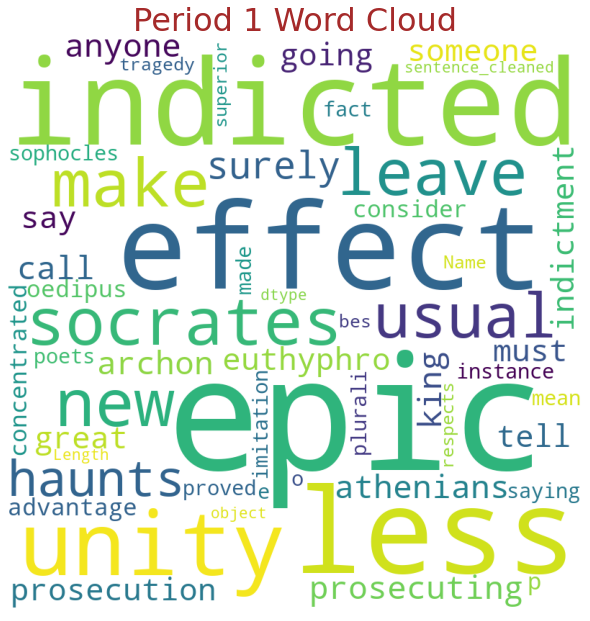

In [26]:
wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='white', 
                #stopwords = stopwords,
                min_font_size = 10).generate(str(p1)) 
# plot the WordCloud image                        
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
plt.title('Period 1 Word Cloud',fontsize=32,color = 'brown')
plt.show() 

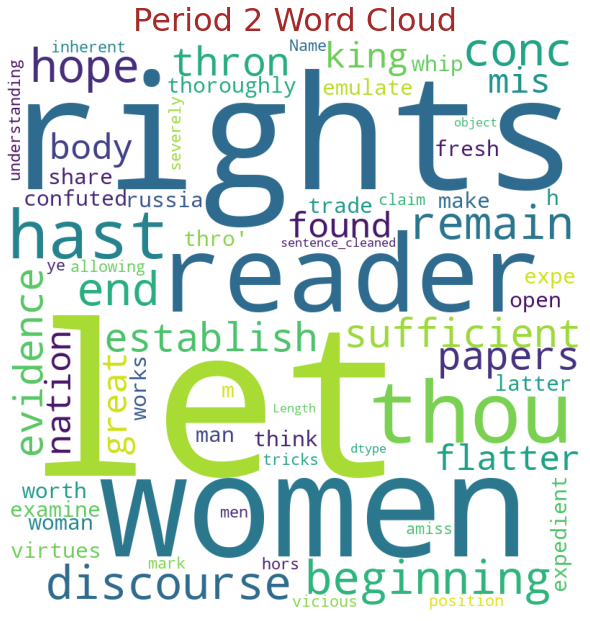

In [27]:
wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='white', 
                #stopwords = stopwords,
                min_font_size = 10).generate(str(p2)) 
# plot the WordCloud image                        
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
plt.title('Period 2 Word Cloud',fontsize=32,color = 'brown')
plt.show() 

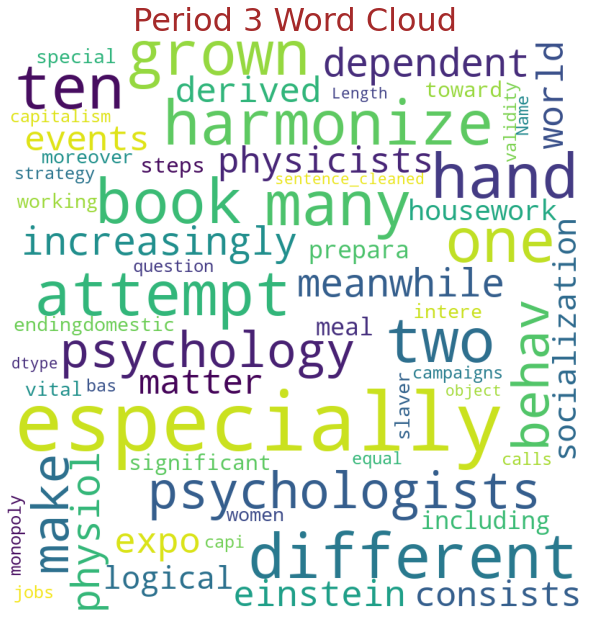

In [28]:
wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='white', 
                #stopwords = stopwords,
                min_font_size = 10).generate(str(p3)) 
# plot the WordCloud image                        
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
plt.title('Period 3 Word Cloud',fontsize=32,color = 'brown')
plt.show() 

In [29]:
# Functions to clean training data.
def remove_pattern(input_txt, pattern):
    r = re.findall(pattern, input_txt)
    for i in r:
        input_txt = re.sub(i, '', input_txt)
    return input_txt   

# Functions to clean training data.
def reprocessing(df):
    df['tidy_Tweet'] = np.vectorize(remove_pattern)(df['Tweet'], "@[\w]*") 
    df['tidy_Tweet'] = df['tidy_Tweet'].str.replace("[^a-zA-Z#]", " ")
    df['tidy_Tweet'] = df['tidy_Tweet'].apply(lambda x: ' '.join([w for w in x.split() if len(w)>2]))
    df['tidy_Tweet'] = df['tidy_Tweet'].apply(lambda x: ' '.join([word.lower() for word in x.split() if word not in stop_words]))
    lmtzr = WordNetLemmatizer()
    df['tidy_Tweet'] = df['tidy_Tweet'].apply(lambda x: ' '.join([lmtzr.lemmatize(w,'v') for w in x.split()]))
    return df['tidy_Tweet']

In [30]:
# Import training data.
df_train = pd.read_csv('data/training/2018-E-c-En-train.txt', sep="\t")
df_dev = pd.read_csv('data/training/2018-E-c-En-dev.txt', sep="\t")
X_train = reprocessing(df_train)
X_dev = reprocessing(df_dev)
#X_test1 = reprocessing(df_test1)
#X_test2 = reprocessing(df_test2)
#X_test3 = reprocessing(df_test3)

<ipython-input-29-9aa55a21631d>:11: FutureWarning: The default value of regex will change from True to False in a future version.
  df['tidy_Tweet'] = df['tidy_Tweet'].str.replace("[^a-zA-Z#]", " ")


In [31]:
from keras.preprocessing.text import one_hot
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers.core import Activation, Dropout, Dense
from keras.layers import Flatten, LSTM
from keras.layers import GlobalMaxPooling1D
from keras.models import Model, load_model
from keras.layers.embeddings import Embedding
from sklearn.model_selection import train_test_split
from keras.preprocessing.text import Tokenizer
from keras.layers import Input
from keras.layers.merge import Concatenate
from keras.layers import Bidirectional

In [33]:
# Get tokenizer.
X_train = df_train.tidy_Tweet
y_train = df_train.drop(labels = ['ID','Tweet','tidy_Tweet'], axis=1)
X_dev = df_dev.tidy_Tweet
y_dev = df_dev.drop(labels = ['ID','Tweet','tidy_Tweet'], axis=1)
                    

print(X_train.shape, X_dev.shape)
X_train_dev = pd.concat([X_train, X_dev])
#print(type(X_train), type(X_dev))
print(X_train_dev.shape)
#print(newX[:10])
tokenizer = Tokenizer(num_words=10000)
#fix
#tokenizer.fit_on_texts(X_train)
#tokenizer.fit_on_texts(X_test)
 
tokenizer.fit_on_texts(X_train_dev)

maxlen = 150

(6838,) (886,)
(7724,)


In [35]:
# Tokenize test data.
def format(value):
    value = str(value)
    return value

periods = [p1,p2,p3]
for p in range(3):
    periods[p] = periods[p].apply(format)
    periods[p] = tokenizer.texts_to_sequences(periods[p])
    periods[p] = pad_sequences(periods[p], padding='post', maxlen=maxlen)
periods

[array([[  43,    4,   67, ...,    0,    0,    0],
        [1672,  253,  527, ...,    0,    0,    0],
        [  86, 7041, 6164, ...,    0,    0,    0],
        ...,
        [ 532, 4591, 2403, ...,    0,    0,    0],
        [ 532, 4591, 2403, ...,    0,    0,    0],
        [ 749, 2125,  153, ...,    0,    0,    0]]),
 array([[3228,  128, 1395, ...,    0,    0,    0],
        [ 754, 1387,  105, ...,    0,    0,    0],
        [3912, 5148, 3928, ...,    0,    0,    0],
        ...,
        [1432,  556, 2279, ...,    0,    0,    0],
        [ 749,  446,    0, ...,    0,    0,    0],
        [ 887, 7856,  556, ...,    0,    0,    0]]),
 array([[ 234,  610,  246, ...,    0,    0,    0],
        [  11,  232,  197, ...,    0,    0,    0],
        [   4, 1335, 3510, ...,    0,    0,    0],
        ...,
        [8611,  556, 8271, ...,    0,    0,    0],
        [9108,  446, 4027, ...,    0,    0,    0],
        [4987,  489,  332, ...,    0,    0,    0]])]

In [36]:
# Load the model.
model = load_model('LSTM_model_ver1.h5')

In [37]:
# Use the model to predict emotions with test data.
#It takes a whole night to run.
predictions = []
for p in range(3):
    predictions.append(model.predict(periods[p]))
    print(predictions[p].shape)
    print(type(predictions[p]))
    print(predictions[p])

(87145, 11)
<class 'numpy.ndarray'>
[[0.0683642  0.06477746 0.07298347 ... 0.30385163 0.01365325 0.02412406]
 [0.82950515 0.03499401 0.8746191  ... 0.3642916  0.03177992 0.00259036]
 [0.7315728  0.0698064  0.68020916 ... 0.49464834 0.01361033 0.00793239]
 ...
 [0.15993145 0.53092486 0.28850675 ... 0.04456455 0.18099338 0.01315185]
 [0.91429484 0.07646927 0.89092505 ... 0.24256292 0.0093683  0.01464564]
 [0.92810947 0.03154421 0.9070591  ... 0.380937   0.00325072 0.00777265]]
(76568, 11)
<class 'numpy.ndarray'>
[[0.58106196 0.08824077 0.59580016 ... 0.360851   0.01457551 0.01559582]
 [0.20860311 0.02674904 0.1591281  ... 0.42966512 0.00308827 0.09832028]
 [0.40795845 0.0253956  0.534518   ... 0.91474503 0.00609019 0.00372052]
 ...
 [0.54450953 0.15508506 0.42789105 ... 0.03429049 0.06158248 0.01737145]
 [0.44795457 0.11173439 0.5140315  ... 0.4792212  0.02205765 0.01748002]
 [0.9733591  0.02344942 0.94549716 ... 0.29450285 0.01906937 0.00276735]]
(181440, 11)
<class 'numpy.ndarray'>
[[0

In [39]:
# Save the prediction results in probablity form.
for p in range(3):
    print(predictions[p])
    np.savetxt("data\\Predictions\\Predictions_prob"+str(p+1)+".csv",predictions[p], delimiter = ',') 

[[0.0683642  0.06477746 0.07298347 ... 0.30385163 0.01365325 0.02412406]
 [0.82950515 0.03499401 0.8746191  ... 0.3642916  0.03177992 0.00259036]
 [0.7315728  0.0698064  0.68020916 ... 0.49464834 0.01361033 0.00793239]
 ...
 [0.15993145 0.53092486 0.28850675 ... 0.04456455 0.18099338 0.01315185]
 [0.91429484 0.07646927 0.89092505 ... 0.24256292 0.0093683  0.01464564]
 [0.92810947 0.03154421 0.9070591  ... 0.380937   0.00325072 0.00777265]]
[[0.58106196 0.08824077 0.59580016 ... 0.360851   0.01457551 0.01559582]
 [0.20860311 0.02674904 0.1591281  ... 0.42966512 0.00308827 0.09832028]
 [0.40795845 0.0253956  0.534518   ... 0.91474503 0.00609019 0.00372052]
 ...
 [0.54450953 0.15508506 0.42789105 ... 0.03429049 0.06158248 0.01737145]
 [0.44795457 0.11173439 0.5140315  ... 0.4792212  0.02205765 0.01748002]
 [0.9733591  0.02344942 0.94549716 ... 0.29450285 0.01906937 0.00276735]]
[[0.58178633 0.13242063 0.6512615  ... 0.5064422  0.02612141 0.01984069]
 [0.01012602 0.6705438  0.02421331 ... 

In [40]:
# Use 0.37 as the threshold to make predictions binary.
def threshold(value):
    if float(value)>=0.37:
        return int(1)
    else:
        return int(0)
    
for p in range(3):
    for aprediction in predictions[p]:
        for aemotion in range(len(aprediction)):
            aprediction[aemotion] = int(threshold(aprediction[aemotion]))
    predictions[p]=predictions[p].astype(int)
predictions

[array([[0, 0, 0, ..., 0, 0, 0],
        [1, 0, 1, ..., 0, 0, 0],
        [1, 0, 1, ..., 1, 0, 0],
        ...,
        [0, 1, 0, ..., 0, 0, 0],
        [1, 0, 1, ..., 0, 0, 0],
        [1, 0, 1, ..., 1, 0, 0]]),
 array([[1, 0, 1, ..., 0, 0, 0],
        [0, 0, 0, ..., 1, 0, 0],
        [1, 0, 1, ..., 1, 0, 0],
        ...,
        [1, 0, 1, ..., 0, 0, 0],
        [1, 0, 1, ..., 1, 0, 0],
        [1, 0, 1, ..., 0, 0, 0]]),
 array([[1, 0, 1, ..., 1, 0, 0],
        [0, 1, 0, ..., 0, 0, 0],
        [0, 0, 1, ..., 1, 0, 0],
        ...,
        [1, 0, 1, ..., 0, 0, 0],
        [1, 0, 1, ..., 0, 0, 0],
        [1, 0, 1, ..., 0, 0, 0]])]

In [41]:
for p in range(3):
    print(predictions[p])
    np.savetxt("data\\Predictions\\Predictions"+str(p+1)+".csv",predictions[p], delimiter = ',') 

[[0 0 0 ... 0 0 0]
 [1 0 1 ... 0 0 0]
 [1 0 1 ... 1 0 0]
 ...
 [0 1 0 ... 0 0 0]
 [1 0 1 ... 0 0 0]
 [1 0 1 ... 1 0 0]]
[[1 0 1 ... 0 0 0]
 [0 0 0 ... 1 0 0]
 [1 0 1 ... 1 0 0]
 ...
 [1 0 1 ... 0 0 0]
 [1 0 1 ... 1 0 0]
 [1 0 1 ... 0 0 0]]
[[1 0 1 ... 1 0 0]
 [0 1 0 ... 0 0 0]
 [0 0 1 ... 1 0 0]
 ...
 [1 0 1 ... 0 0 0]
 [1 0 1 ... 0 0 0]
 [1 0 1 ... 0 0 0]]
